# STATS 131 Project
Predicting House Sales in King County, USA <br>
__Group:__ Python_Boiz.append(Girl)™ <br>
__Members:__ Tyler Rodriguez, Seungwoo (Roy) Hong, Larny Lopez, Annie Choi  
__YouTube Presentation:__ https://youtu.be/jHJsTiDt8SY

![Image of Yaktocat](http://www.aljanh.net/data/archive/img/1991592156.jpeg)

# Introduction

## Motivation

In five to ten years most of us current college students are going to start looking to buy our first home. When we go to buy the house, we need to know if we're getting a fair price and therefore we need to know what factors go into buying the house. What if there was a perfect model to predict what the price of the house should be?

We looked online for a housing price dataset, and we found an interesting one that contained the prices of houses in Kings County, Washington which includes Seattle and the cities surrounding Seattle such as Federal Way, Burien, Bellevue, and many more. 

This dataset is interesting to us because one day I would love to move to the Seattle area, where there are plenty of opportunities for data scientists at companies such as Microsoft, Amazon, and many other tech companies that have large offices there. Through this dataset, we can not only see the price of a home in the Kings County area but also how the prices compare across different cities. Just as living in Westwood is more expensive than living in San Fernando on average, we wanted to see what cities are more expensive in Seattle, and how much they factor into the price.

## Data Background

Our dataset contains house sale prices sold between May 2014 and May 2015 in King County, Washington. Each row in the data set is a different house that was bought during our observational period. The aim to study the different features included in the dataset like bedrooms, presence of a waterfront, views, conditions of the house, and more in order to assign the best fit model for predicting the prices of houses. 

## Variable Explanations

-  __Square footage:__ The measurement of area, and area is the measurement of any two-dimensional space contained within a set of lines. Simply put, it is a measure of how much space you have.

-  __Date:__ The date the house was bought, formated yearmonthday

-  __Bedrooms:__ How many bedrooms are in the house

-  __Bathrooms:__ How many bathrooms are in the house, .5 implies no shower

-  __sqft_living:__ Square footage of the apartments interior living space

-  __sqft_lot:__ Square footage of the land space that the house has outside it and that the person owns.

-  __floors:__ Number of floors (two stories, three stories, etc)

-  __waterfront:__ A dummy variable for whether the house had a view of a lake,ocean, or any body of water.

-  __view:__ An index from 0 to 4 of how good the view of the property was, how nice the surrounding area is

-  __condition:__ How good the overall condition of the house was at the time, such as was it freshly painting, were the floors old, any holes in the wall.

-  __grade:__ An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

-  __sqft_above:__ The square footage of the interior housing space that is above ground level 

-  __sqft_basement:__ The square footage of the interior housing space that is below ground level 

-  __yr_built:__ The year the house was first built

-  __yr_renovated:__ The year the house was last renovated

-  __zipcode:__ What area zipcode the house is in

-  __lat:__ Lattitude 

-  __long:__ Longitude 

-  __sqft_living15:__ The square footage of interior housing living space for the nearest 15 houses

-  __sqft_lot15:__ The square footage of the land lots of the nearest 15 houses

#### Added Variables:

-  __city:__ Used the zipcode and latitude/ longitude to tell us what city the house was located in

-  __vintage:__ Calculated age when the property is sold

Finally, our response variable is price. This is the price is dollars that the house was bought for.

## Common knowledge

The cities considered nice and more classy based on nearby school quality, safety,cleanliness, and many other factors in Kings County include Seattle, Bellevue, Woodinville,Sammamish, and Kenmore.
The cities that are considered not as nice and on the low tier are Auburn,Seatac,Tukila,and Tacoma.

King County is the most populated county within Washington, with a 912.9 population per square mile. There are 3,142 counties across the United States and King County ranks as the 13th most populated county. 

According to the 2017 United States Census Bureau, Kings County, Washington has a population estimate of 2,188,649 people. There are approximately 851,077 households, with an average of 2.45 people per household. There are approximately 934,552 housing units in Kings County, and 57.4% of these are owner occupied houses. The median value of owner occupied housing units from 2013-2017 is $446,600. 

## Prior Research

Opendoor, a housing pricing website did a study and found the most influential factors that affect housing prices are:
- The past prices of homes recently sold in the area.
- Location, with important subfactors including quality of schools,employment oppurtunities, markets and clothing stores
- Home Size
- Age and Conditions

source: https://www.opendoor.com/w/blog/factors-that-influence-home-value

Zillow, a popular online real estate database company, uses factors such as baths, square footage, zipcode, and year built when people are searching for homes.

We are now going to do our explatory analysis to see if we can see any good potential predictors for price.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("kc_house_data.csv")

# Exploratory Analysis of the Data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Cleaning
##  1. Check for missing observations

In [4]:
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


There are no missing observations in our dataset, so we are able to move directly to exploring the data types of each column.

## 2. Data Types
Ensure that the data are all imported in the proper format

In [5]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Date
Since __date__ is an object, we want to convert it to a date time type. We output the head of the updated dataframe to ensure that it's been changed properly

In [6]:
df['date'] = pd.to_datetime({'year':df.date.str[:4], 'month':df.date.str[4:6], 'day':df.date.str[6:8]})

In [7]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


## 3. Dropping columns
### ID
Since the __ID__ of a property is merely a unique identifier for each property / observation, we drop it from the dataframe. 

In [8]:
df.drop(['id'], axis=1, inplace = True)

## Summary Statistics


In [9]:
df.shape

(21613, 20)

In our dataframe, we have 21,613 observations and 20 columns - which breaks down into
- 19 house features 
- __price__: response variable

### Price: the response variable
Based on our summary statistics below, we see that the mean __price__ of a property is 540,008.81. In addition, we note that the mean __price__ (540,008) is larger than the median (450,000). We expect to see some skew in the distribution of house prices.

In [10]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

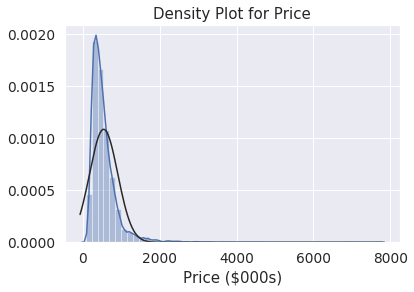

In [46]:
sns.distplot(df['price']/1000 , fit=norm) 
plt.xlabel("Price ($000s)")
plt.title("Density Plot for Price")
plt.show()

As expected, we see some right skew in the distribution of our prices. In order to fix this, we apply a log transformation on __price__ in order to obtain a more normal distribution.

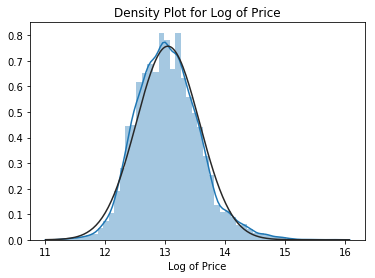

In [12]:
sns.distplot(np.log(df.price) , fit=norm) 
plt.xlabel("Log of Price")
plt.title("Density Plot for Log of Price")
plt.show()

## Correlation between predictors

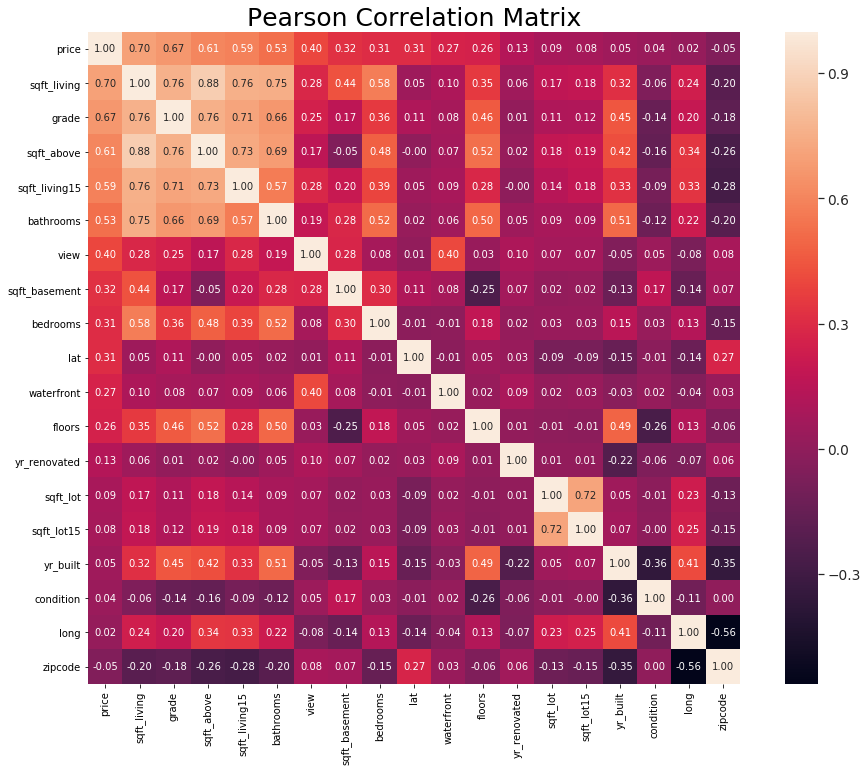

In [13]:
n = 20 # number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(n, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Based on the correlation matrix, the following variables
 - __bathrooms__
 - __sqft_living__
 - __grade__
 - __sqft_above__
 - __sqft_living15__
 
are highly correlated to __price__. These predictors and their corresponding pearson r score is outputted in the table below.

In [14]:
corrmat.loc[((corrmat.price > 0.4) | (corrmat.price < -0.4)), 'price':'price'].sort_values('price', ascending = False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138


## Data Transformations with highly correlated variables
We transformed the Price for boxplots by taking the log to better show the relationship with the variables.

## 1. Bathrooms

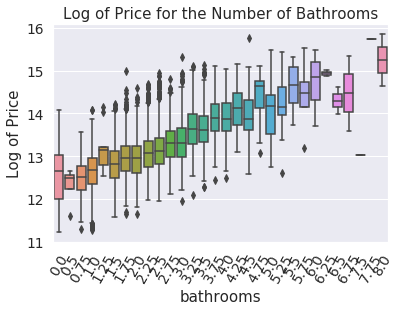

In [15]:
sns.boxplot(x="bathrooms", y=np.log(df.price), data=df).set(ylabel='Log of Price')
plt.xticks(rotation=60)
plt.title("Log of Price for the Number of Bathrooms")
plt.show()

From our graph above, we see a general linear and upward relationship between log of __price__ (in ten thousands) and __bathrooms__. As the number of __bathrooms__ increase, the __price__ of the the property also increases.

## 2. Price and Square Footage of the Apartments Interior Living Space

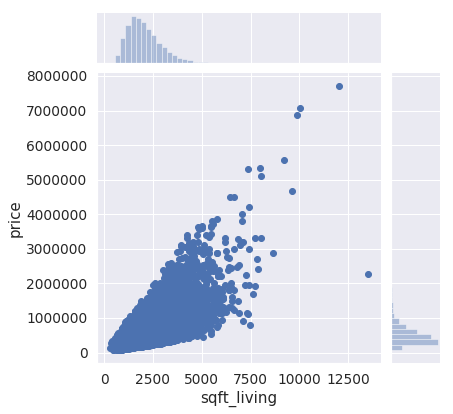

In [16]:
sns.jointplot(x='sqft_living',y= 'price',  data = df)
plt.show()

As we can see, there's a linear association between __sqft_living__ and __price__. The strong positive relationship is shown graphically and numerically (pearsonr = 0.7). The higher the square footage of the living area in a property, the higher the price. 

## 3. Price and Square Footage of the Interior Housing Space Above Ground Level

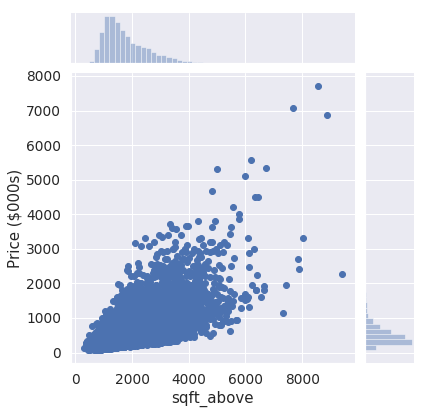

In [17]:
sns.jointplot(x='sqft_above',y= df['price']/1000,  data = df).set_axis_labels("sqft_above", "Price ($000s)")
plt.show()

As we can see, __sqft_above__ is an important predictor for predicting price. Since __sqft_above__ measures the square footage of the house except for the basement, we see that 

__sqft_living__ $=$ __sqft_above__ $+$ __sqft_basement__

Having all three of these variables is redundant and causes multicollinearity. We are more interested in how 
__sqft_basement__ divided by the entire square footage affects price.

Therefore, we define

__sqft_basement_ratio__ $=$ __sqft_basement__ / __sqft_living__

In [18]:
df['sqft_basement'] = df['sqft_basement'] / df['sqft_living']
df = df.rename(columns = {'sqft_basement':'sqft_basement_ratio'})
df = df.drop(columns = "sqft_above")

## 4. Grade

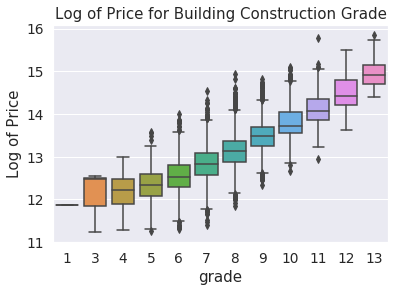

In [19]:
sns.boxplot(x="grade", y=np.log(df.price), data=df)
plt.ylabel('Log of Price')
plt.title("Log of Price for Building Construction Grade")
plt.show()


As we can see in the boxplots above, the higher the grade of the house, the the higher the price, seems to have an extremely high correlation.

## 5. Price and Square Footage of Interior Housing Living Space for the Nearest 15 Houses

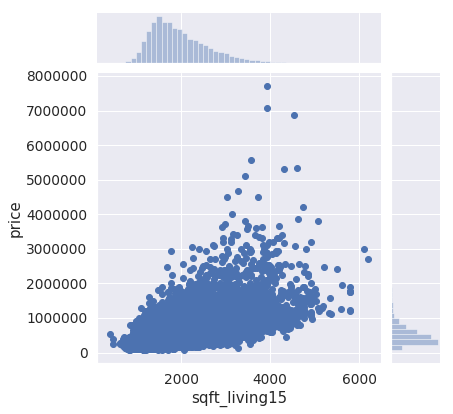

In [20]:
sns.jointplot(x="sqft_living15", y="price", data=df)
plt.show()

We see moderate correlation between price and square footage of the interior housing living space for the nearest 15 houses. 

# Data Transformations with Weakly Correlated Variables

In [21]:
corrmat.loc[:,'price':'price'].sort_values('price').iloc[1:15,:]

,price
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003
bedrooms,0.308350


## 1. Price and the Calculated Age of the Property When Sold

__yr_built__ and __yr_renovated__ ranked very low correlation because the size of numerics itself is nothing to do with price.
_How old is an apartment when it's sold?_ is more important information to predict the price. Renovation has to be in consideration as well. It can be calculated using __Date__,__yr_built__, and __yr_renovated.__

In [22]:
df['vintage'] = df.date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1) 
# gets the latest year from 'yr_built' and 'yr_renovated'.

__vintage__ obtains the latest year from __yr_built__ and __yr_renovated__.

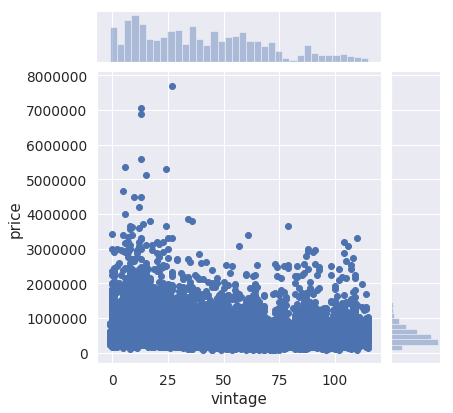

In [23]:
sns.jointplot(x='vintage',y='price',data = df)
plt.show()

__Price__ is likely to decrease as __vintage__ grows.

## 2. Conditon

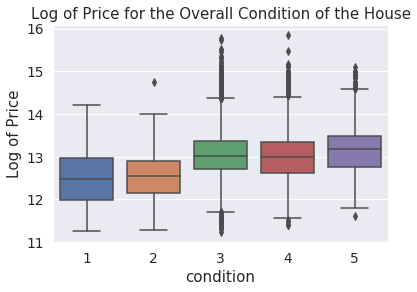

In [24]:
sns.boxplot(x="condition", y=np.log(df.price), data=df)
plt.ylabel('Log of Price')
plt.title("Log of Price for the Overall Condition of the House")
plt.show()


__Condition__ and __price__ do not seem to have a strong relationship, so it may not be a good indicator.

## 3. View

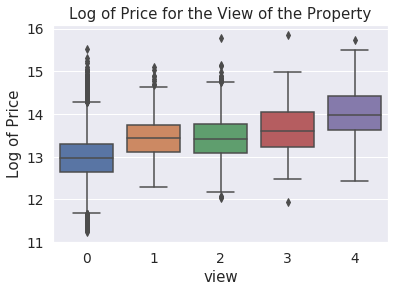

In [25]:
sns.boxplot(x="view", y=np.log(df.price), data=df)
plt.ylabel('Log of Price')
plt.title("Log of Price for the View of the Property")
plt.show()


We see in the boxplot above that __view__ and __price__ have a slight positive relationship, but we need further analysis to see if their relationship is statistically significant.

## 4. Floors

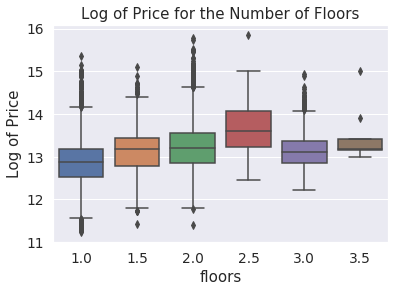

In [26]:
sns.boxplot(x="floors", y=np.log(df.price), data=df)
plt.ylabel('Log of Price')
plt.title("Log of Price for the Number of Floors")
plt.show()

As shown in the box plots above, there is not much correlation between __floors__ and __price__.

## 5. Waterfront

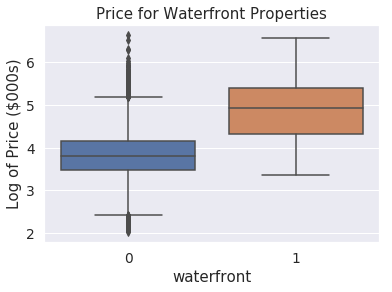

In [27]:
sns.boxplot(x="waterfront", y=np.log(df.price/10000), data=df)
plt.ylabel('Log of Price ($000s)')
plt.title("Price for Waterfront Properties")
plt.show()

When the property is not on the __waterfront__, there is a short boxplot. This indicates that the prices of non-waterfront properties are very similar to each other. In contrast, the boxplot for the properties on the waterfront are very variable. There is only a 0.266 correlation coefficient, which is relatively small. 

# Further Analysis 

## Distributions of houses grouped by city

Creates a new column called __city__ based on the zipcode

In [28]:
zip_city = pd.read_table('zip codes.txt', sep=',', header = None)
dic_zip_city ={zip_and_city[0]:zip_and_city[1] for (index, zip_and_city) in zip_city.iterrows()}
city = [dic_zip_city[zip_code] for zip_code in df.zipcode]
df['city'] =city
df['city'] = df['city'].astype('category')

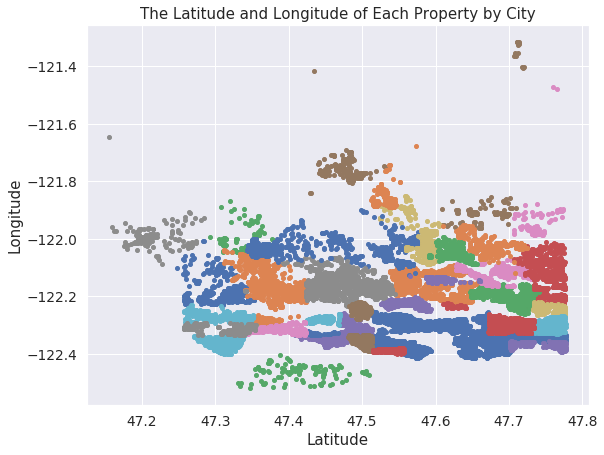

In [29]:
groups = df.groupby('city')
fig, ax = plt.subplots(figsize=(9, 7))
for name, group in groups:
    ax.plot(group.lat, group.long, marker='o', linestyle=' ', ms=4, label = name)
#ax.legend()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("The Latitude and Longitude of Each Property by City")
plt.show()

## Price and Square Foot Living by City

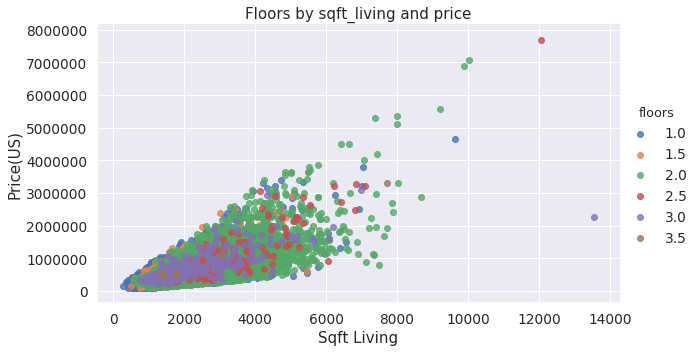

In [30]:
sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df, hue="floors", fit_reg=False)
plt.title("Floors by sqft_living and price", fontsize=15)
plt.xlabel("Sqft Living")
plt.ylabel("Price(US)")
plt.show()

### The number of unique cities in our data set.

In [31]:
df.city.unique().size

36

We calculate the median price of each unique city in our data set.

In [32]:
df.groupby(["city"]).price.median().sort_values(ascending=False)

city
Medina                1892500.0
Mercer Island          993750.0
Bellevue               769250.0
Sammamish              739999.0
”Sammamish"            642000.0
”Remond"               635000.0
Redmond                615000.0
Issaquah               572000.0
Woodinville            570000.0
“Bellevue"             555000.0
”Shoreline”            554000.0
Kirkland               510000.0
Snoqualmie             500000.0
Seattle                500000.0
”Seattle"              498500.0
Bothell                470000.0
Vashon                 463750.0
Fall City              460000.0
”Kenmore"              445000.0
Carnation              415000.0
Duvall                 401250.0
North Bend             399500.0
”Lake Forest Park”     375000.0
Black Diamond          359999.5
Renton                 358000.0
”Maple Valley"         342000.0
”Burien"               305000.0
Burien                 285000.0
Kent                   283200.0
Enumclaw               279500.0
”Tukwila"              278277.0
Aub

## This is our final dataset after data cleaning & transformations

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement_ratio,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,vintage,city
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0.000000,1955,0,98178,47.5112,-122.257,1340,5650,59,"”Tukwila"""
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0.155642,1951,1991,98125,47.7210,-122.319,1690,7639,23,"”Seattle"""
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0.000000,1933,0,98028,47.7379,-122.233,2720,8062,82,"”Kenmore"""
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0.464286,1965,0,98136,47.5208,-122.393,1360,5000,49,"”Seattle"""
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0.000000,1987,0,98074,47.6168,-122.045,1800,7503,28,"”Sammamish"""


# Data Modeling

## Multiple Linear Regression

Multiple Linear Regression is used to predict house prices based on other variables excluding date and ID number.

## Training and Testing Split (70-30)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_basement_ratio','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','vintage']], df[['price']], test_size=0.43, random_state=0)               

Randomly splits the training & testing data    

In [35]:
X_train.shape, y_train.shape 

((12319, 17), (12319, 1))

In [36]:
X_test.shape, y_test.shape 

((9294, 17), (9294, 1))

In [37]:
model = smf.ols('price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+grade+sqft_basement_ratio+yr_built+yr_renovated+city+lat+long+sqft_living15+sqft_lot15+vintage', data = df)

results = model.fit()

## Model Summary

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1355.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:58:19   Log-Likelihood:            -2.9208e+05
No. Observations:               21613   AIC:                         5.843e+05
Df Residuals:                   21561   BIC:                         5.847e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Coefficients

We see in our multiple linear regression model that our intercept is 0 because if all of the predictors were 0, then the house would not be worth anything. The coefficients show that for every increase in a unit of the variable, price goes up by that amount. For example, for every increase in one foot of sqft_living (square footage the the living area), price would increase by 201.9507 USD. For every increase in the number of bathrooms, price went up 49,860 USD. Interestingly, the number of bedrooms had  a negative coefficient, so for every increase in the number of bedrooms, the price went down 34,140 USD. In further research why that happened since we would assume more bedrooms would mean a higher price.

In [39]:
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred = regressor.predict(X_test)  

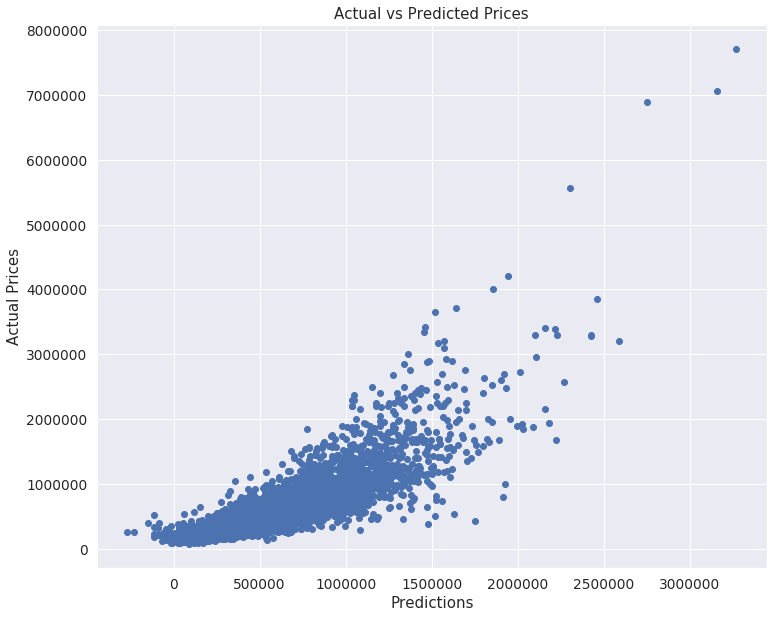

In [41]:
plt.subplots(figsize=(12, 10))
plt.plot(y_pred, y_test, 'bo')
plt.xlabel('Predictions')
plt.ylabel('Actual Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

According the plot, the linear model predicts the house prices on testing data pretty well, but it is likely to overestimate the prices since there are lots of observations spotted on the bottom-right side.

# Cross-validation

In [42]:
# replace city column with category codes
df['city'] = df.city.cat.codes

X = df.drop(['price', 'date'], axis =1)
y = df.price

In [43]:
cv_scores =  cross_val_score(regressor, X, y, cv = 10)

print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.7002502  0.7055479  0.69508896 0.70043824 0.68690629 0.70967605
 0.7136914  0.71446191 0.70149624 0.67515751]
Average 10-Fold CV Score: 0.7002714689692985


It is ensured that the model is not overfitting features unique to the training data.

# Shrinkage: Ridge Regression

In [44]:
alpha_range = np.linspace(0, 5, 10)
ridge_val = []

ridge = Ridge(normalize = True)

for alpha in alpha_range:

    ridge.alpha = alpha
    
    ridge_cv = cross_val_score(ridge, X, y, cv = 10)
    
    ridge_val.append(np.mean(ridge_cv))

pd.DataFrame({'alpha':alpha_range,'score':ridge_val})

,alpha,score
0,0.000000,0.700271
1,0.555556,0.658086
2,1.111111,0.609222
3,1.666667,0.565353
4,2.222222,0.526755
5,2.777778,0.492814
6,3.333333,0.462842
7,3.888889,0.436228
8,4.444444,0.412458
9,5.000000,0.391111


alpha = 0 (Ordinary Least Squares) yields the highest score, regression shrinkage methods are not necessary

# Conclusion

Since we got an Adjusted R squared value of around 69%, our model does a good job of predicting the price of the houses since 69% of the variability of price can be explained by our model. All of our variables in the model are significant, and given the variables are model would give us a good estimate for the house prices in Kings County. So pack your bags, Seattle we’re coming for you!


# Limitations and Further Research

Since the data is from 2014-2015, our data may be a little outdated due to inflation and a different current housing market. It would also be helpful to add more useful variables to the data set, such as if the house has a pool, if the house has heating and air conditioning, and some other factors. If a house has a pool, it adds a lot of value to the house, so it could be useful to have more descriptive variables similar to that. Also, although we tested other models, if we added more variables we may be able to implement machine learning techniques to give us a more accurate model.